# Import modules

In [1]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Using TensorFlow backend.


# Tuning parameters

In [2]:
epoch = 5000
learning_rate = 0.1

# Data

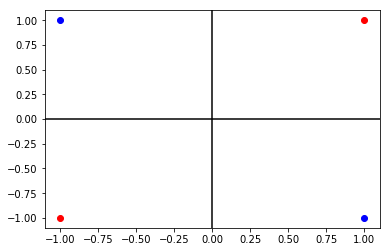

In [3]:
# input
x = np.array([[1,1], [1,-1], [-1,-1], [-1,1]])
# output
y = np.array([[0], [1], [0], [1]])

# plot the training data
fig, ax = plt.subplots()
for i in range(y.shape[0]):
  if y[i][0] == 0:
    marker = 'ro'
  else:
    marker = 'bo'
  ax.plot(x[i][0], x[i][1], marker)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

# Creating the DNN model

In [4]:
model = Sequential()

## Adding layers to the model

In [5]:
model.add(Dense(2, activation='sigmoid', input_dim=2))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


## Visualization the model

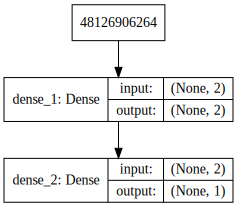

In [7]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

## Optimizer

In [8]:
optimizer = keras.optimizers.SGD(lr=learning_rate)

## Compiling the model

In [9]:
model.compile(loss=keras.losses.mean_squared_error, 
              optimizer=optimizer, 
              metrics=['accuracy'])

## Training the model

Epoch 0 : 0.001176762394607067
Epoch 500 : 0.0011495177168399096
Epoch 1000 : 0.0011234763078391552
Epoch 1500 : 0.0010985617991536856
Epoch 2000 : 0.0010747065534815192
Epoch 2500 : 0.001051841420121491
Epoch 3000 : 0.0010299021378159523
Epoch 3500 : 0.0010088555281981826
Epoch 4000 : 0.0009886270854622126
Epoch 4500 : 0.0009691655286587775


Text(0, 0.5, 'Loss')

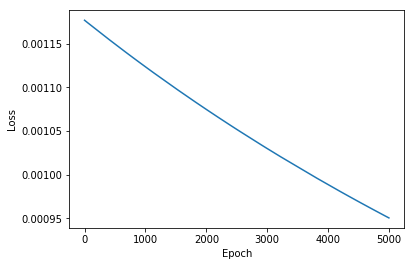

In [15]:
history = model.fit(x, y, epochs=epoch, verbose=0)
for i in range(0, epoch, 500):
  print('Epoch', i, ':', history.history['loss'][i])

fig, ax = plt.subplots()
ax.plot(history.history['loss'])
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

## Evaulating the model

In [16]:
score = model.evaluate(x, y, verbose=0)
print('Loss:', score[0])
print('Accuracy:', score[1])

Loss: 0.0009504612535238266
Accuracy: 1.0


## Prediction the model

In [17]:
y_pred = model.predict(x)

In [18]:
print('Input')
print(x)
print('Label')
print(y)
print('Output')
print(y_pred)

Input
[[ 1  1]
 [ 1 -1]
 [-1 -1]
 [-1  1]]
Label
[[0]
 [1]
 [0]
 [1]]
Output
[[0.02921682]
 [0.9676289 ]
 [0.02919667]
 [0.9676289 ]]
